In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_costs.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density 
1 -124.2945 42.21193 387.5008 2.10        1    1      102.39621 51167.16
2 -123.8987 40.71212 554.1549 0.80        0    1       55.00000 48183.45
3 -123.9778 41.15724 462.4003 0.46        1    1       24.51245 51675.95
4 -124.0749 41.69113 310.1873 0.70        1    1       64.69794 58227.45
5 -123.6292 39.83341 636.2545 0.70        1    1       78.60288 47511.05
6 -123.8913 41.34770 354.7943 0.46        1    0       84.20680 52603.24
  PctLarge  PctOld     ⋯ minT      JanMin     TOctSep   Jan20 PcumOctSep
1 0.1931126 0.00000000 ⋯ -1.701227  0.2686584 10.650637 0     3508.975  
2 0.3004344 0.11428571 ⋯ -3.631704 -1.6740057  9.548764 0     3029.574  
3 0.2191781 0.06666667 ⋯ -3.165836 -1.3108726 10.921748 0     2914.449  
4 0.2395833 0.07954546 ⋯ -2.734460 -0.7594389 11.435045 0     3241.801  
5 0.3593750 0.50000000 ⋯ -4.173242 -2.0681493 10.979370 0     2751.259  
6 0.1860465 0.01282051 ⋯ -3.712275 -1.7491565 11.032777 0     2947.334  
  SprsFires PctSprs   SprsAcre    SprsDays OutDays
1 2         1.0000000    0.200000  0.0      3.5   
2 1         1.0000000   14.400000  0.0     11.0   
3 7         0.8750000    8.257143  3.0      6.0   
4 1         0.3333333    0.100000  0.0      1.0   
5 1         1.0000000 3597.000000 34.0     72.0   
6 6         1.0000000    1.433333  0.5      1.0

In [3]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.2692
proc.time() - ptm

   user  system elapsed 
 30.248   0.618  33.496 

In [4]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + 
    te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81562    0.13737  27.775  < 2e-16 ***
host         0.43714    0.12934   3.380 0.0007

In [11]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.2692
proc.time() - ptm

   user  system elapsed 
 28.860   0.606  31.826 

In [12]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(Jan20) + te(PcumOctSep) + te(SprsFires) + te(PctSprs) + 
    te(SprsAcre) + te(SprsDays) + te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81308    0.13690  27.853  < 2e-16 ***
host         0.43932    0.12894   3.407 0.000666 ***
forest       0.15733    0.06

In [13]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep', 'SprsFires', 'PctSprs', 'SprsAcre', 
  'SprsDays', 'OutDays')

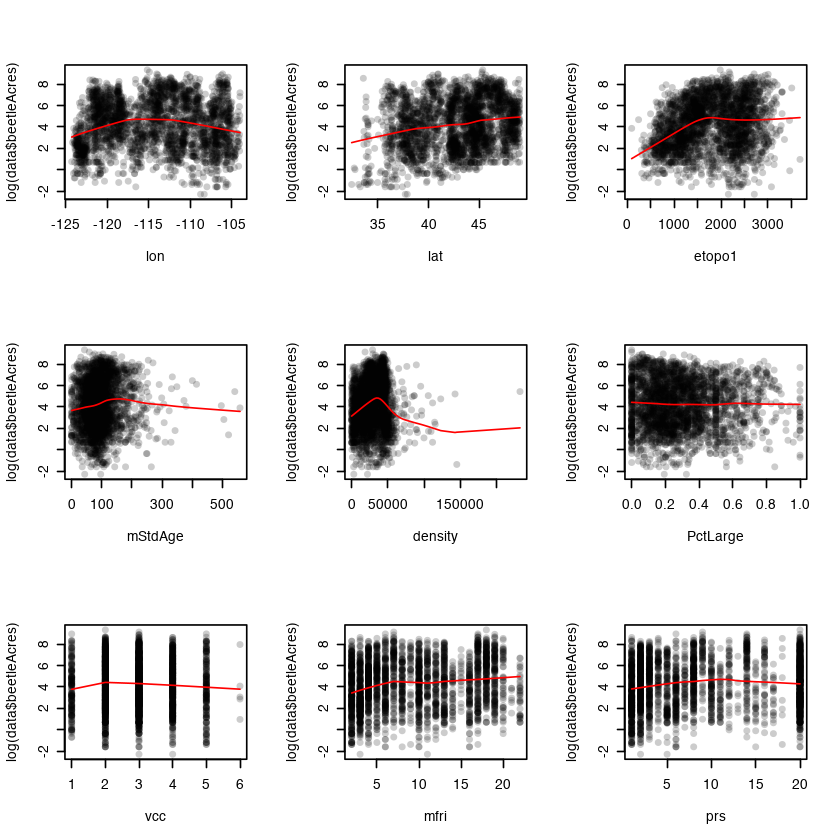

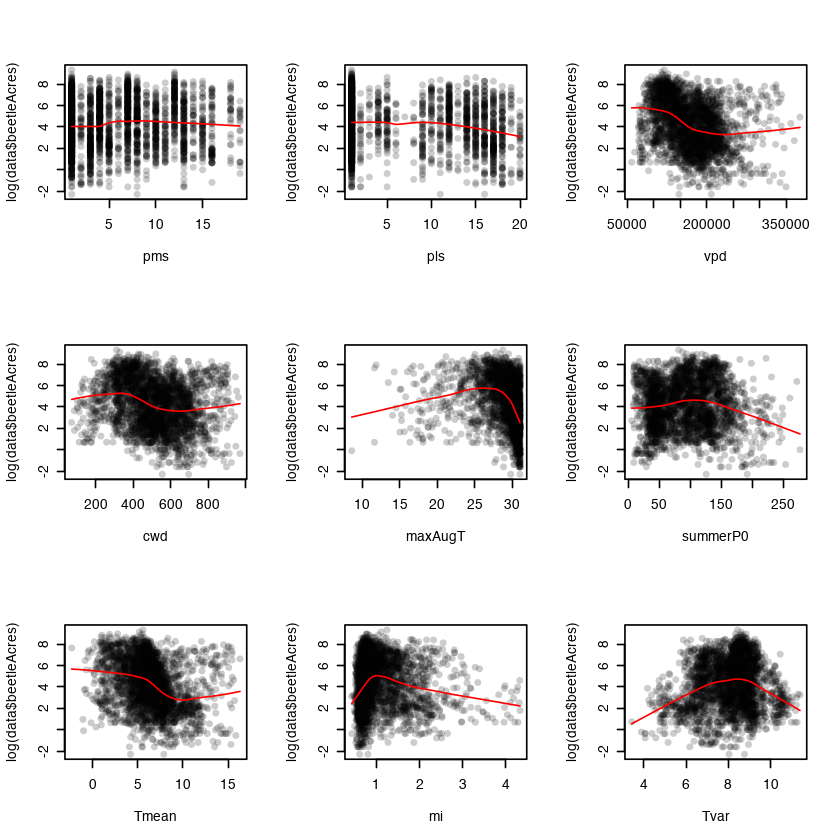

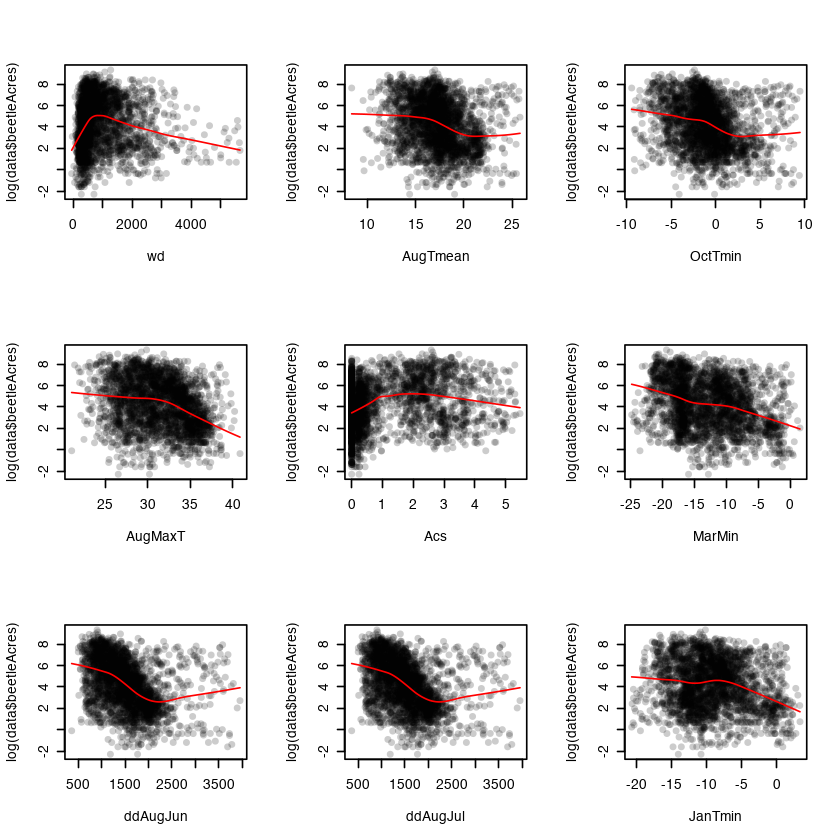

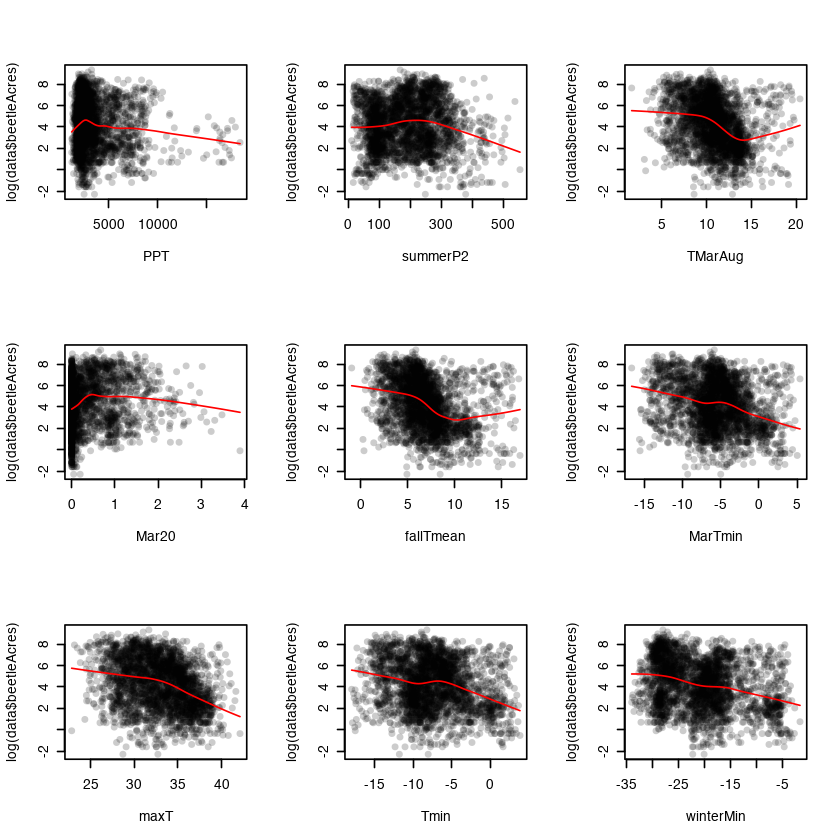

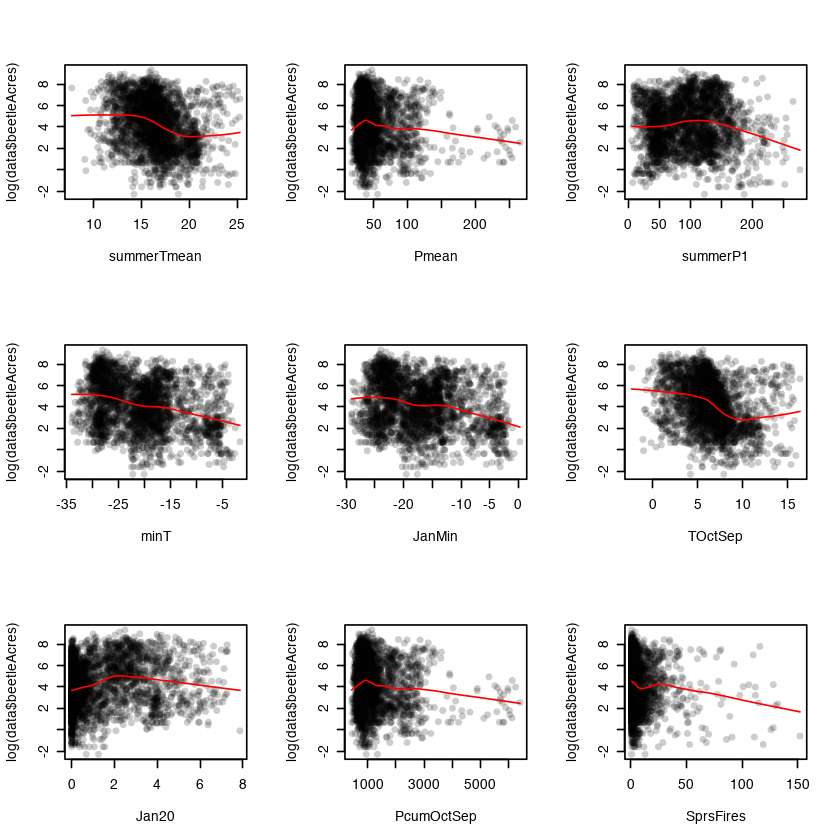

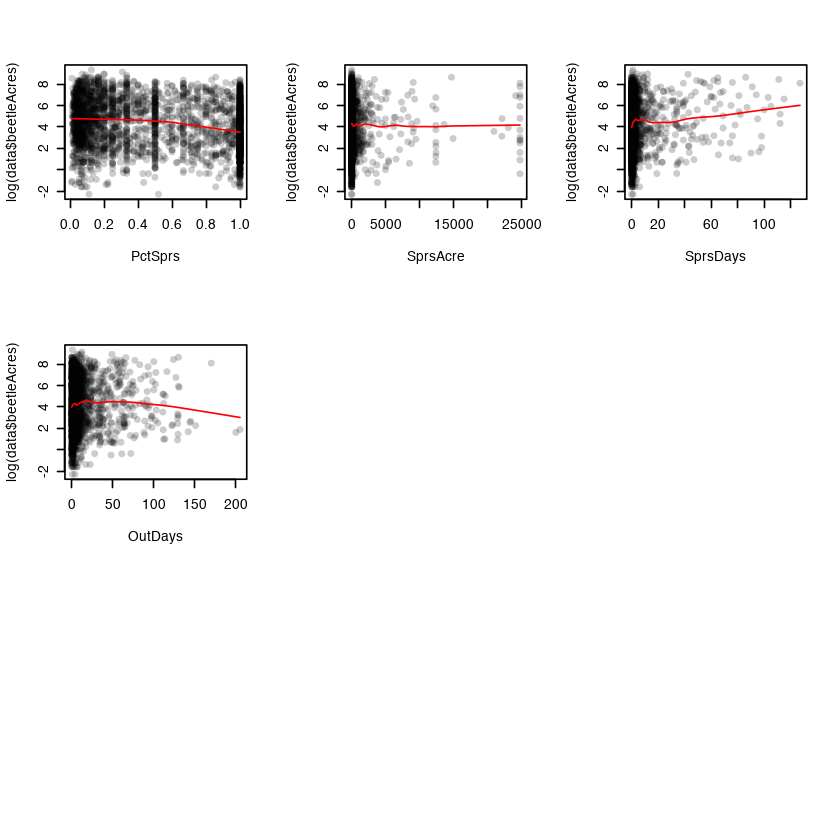

In [14]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [15]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 5000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
-
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
278.929  16.973 339.597 

In [16]:
bstar <- as.data.frame(bstar)

In [17]:
head(bstar)

(Intercept) lon        I(lon^2)     lat          I(lat^2)     etopo1     
1 119.79509    2.9973319  0.013932867  0.662282765 -0.008728867 0.002931203
2 147.78877    2.7387071  0.012740960 -0.007169862 -0.002130682 0.001330901
3 -68.62476   -0.5618022 -0.001826112  1.001826651 -0.012782093 0.001688578
4  39.27439    1.3732619  0.006492573  1.414693855 -0.016384816 0.002113503
5 -54.56742    0.7033879  0.004458686  2.107275680 -0.027126309 0.002378410
6  60.18131    1.9003301  0.008933822  1.448053378 -0.019285251 0.001915268
  I(etopo1^2)   mStdAge     I(mStdAge^2)  density      ⋯ exp(TOctSep) 
1 -3.734962e-07 0.001445681 -3.003135e-06 4.113151e-05 ⋯ -0.0001723235
2  9.284922e-08 0.003990841 -9.750664e-06 3.507360e-05 ⋯ -0.0002033022
3 -8.640444e-09 0.003177565 -9.705865e-06 5.497924e-05 ⋯ -0.0001923214
4 -4.343543e-08 0.003004020 -9.387158e-06 4.083028e-05 ⋯ -0.0001683214
5 -9.109953e-08 0.004939286 -1.651104e-05 5.531170e-05 ⋯ -0.0002424829
6  4.032354e-08 0.003838361 -1.117807e-05 4.713648e-05 ⋯ -0.0001197087
  Jan20      I(Jan20^2) PcumOctSep I(PcumOctSep^2) SprsFires  PctSprs   
1 -0.2968232 0.09949114 -0.2200244 5.476033e-05    0.01920148 -0.4148745
2 -0.6423499 0.12026069 -0.1458805 3.392286e-05    0.01713894 -0.6715303
3 -0.4138327 0.10002845 -0.2014554 4.752492e-05    0.02467795 -0.6325639
4 -0.2995897 0.08142140 -0.1682029 3.173883e-05    0.02846680 -0.9621526
5 -0.3376997 0.09032987 -0.2103631 4.173988e-05    0.01904953 -0.5645990
6 -0.1890846 0.07351813 -0.1660072 3.556134e-05    0.02226872 -0.8447816
  SprsAcre      SprsDays      OutDays    
1 -7.052366e-05  0.0063916505 0.003242844
2 -4.495420e-05 -0.0008504008 0.005005503
3 -5.151567e-05  0.0015805242 0.004104198
4 -2.471216e-05 -0.0038975101 0.003308349
5 -3.522119e-05  0.0018168934 0.002300531
6 -3.121275e-05 -0.0050419781 0.001893271

In [18]:
dim(bstar)
names(bstar)

[1] 5000   90

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "SprsFires"       "PctSprs"         "SprsAcre"       
[89] "SprsDays"        "OutDays"

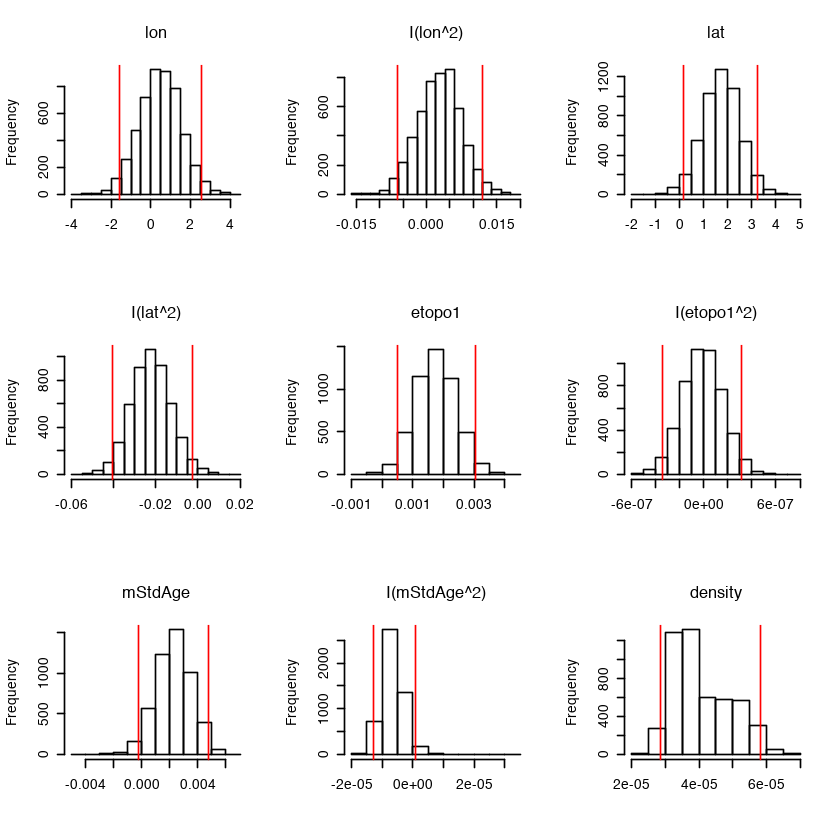

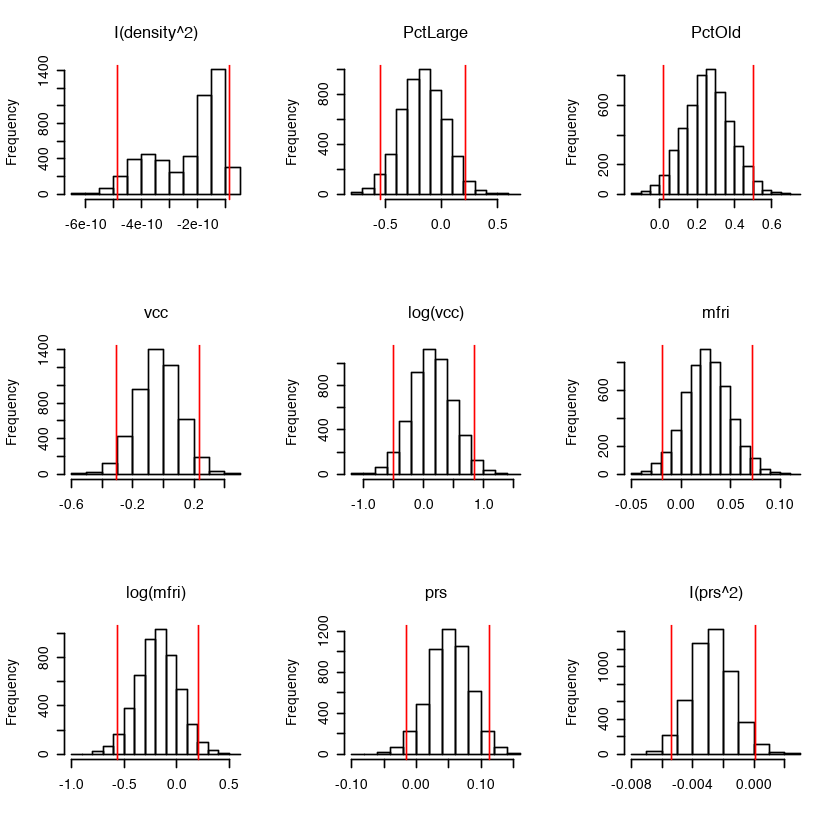

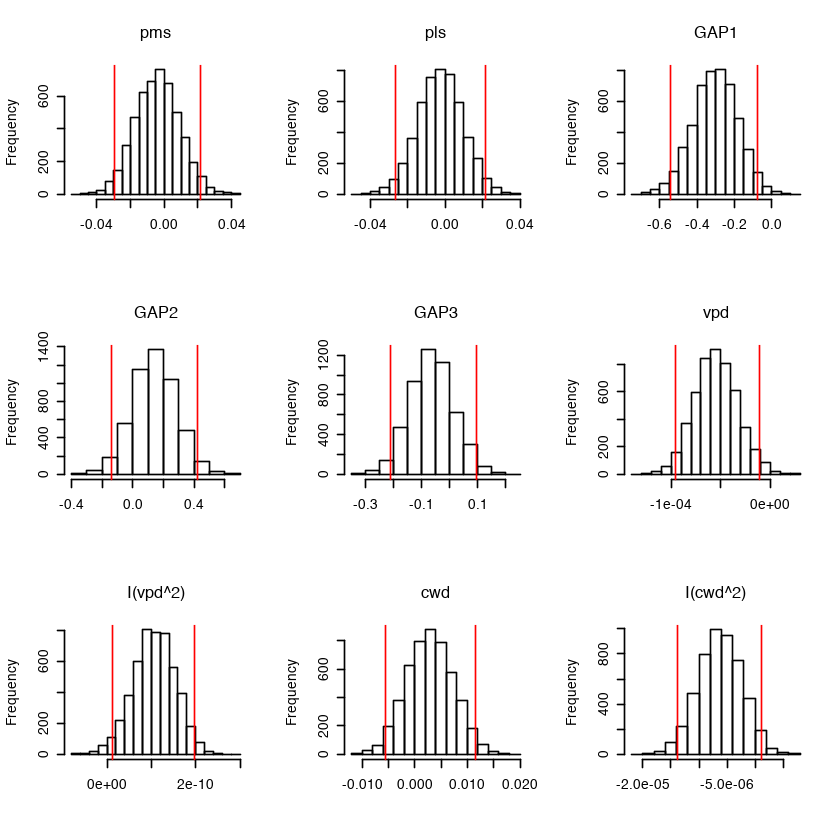

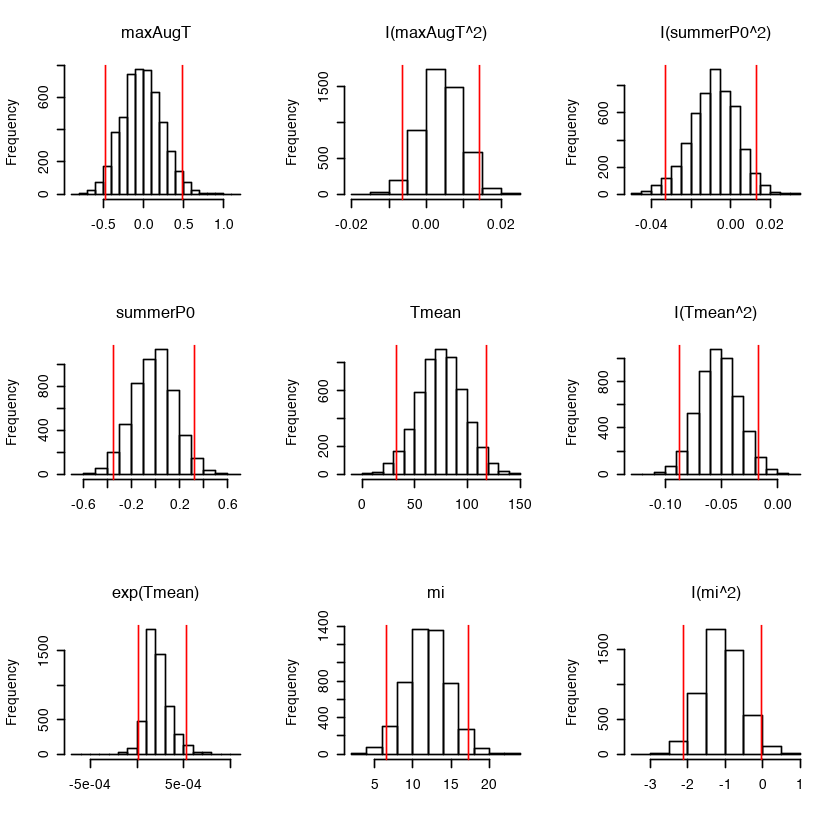

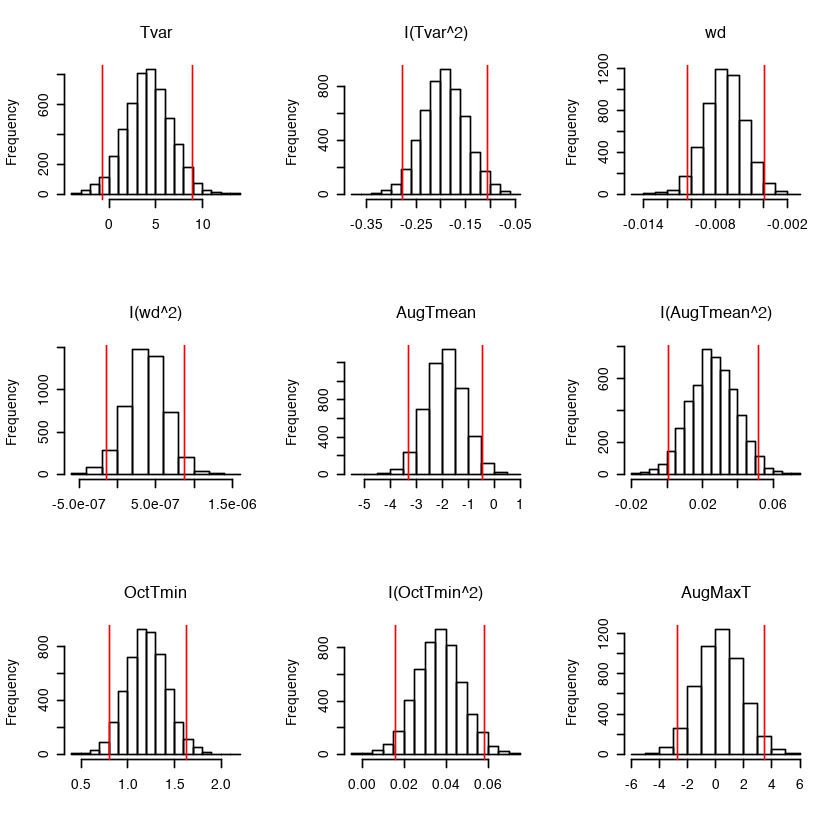

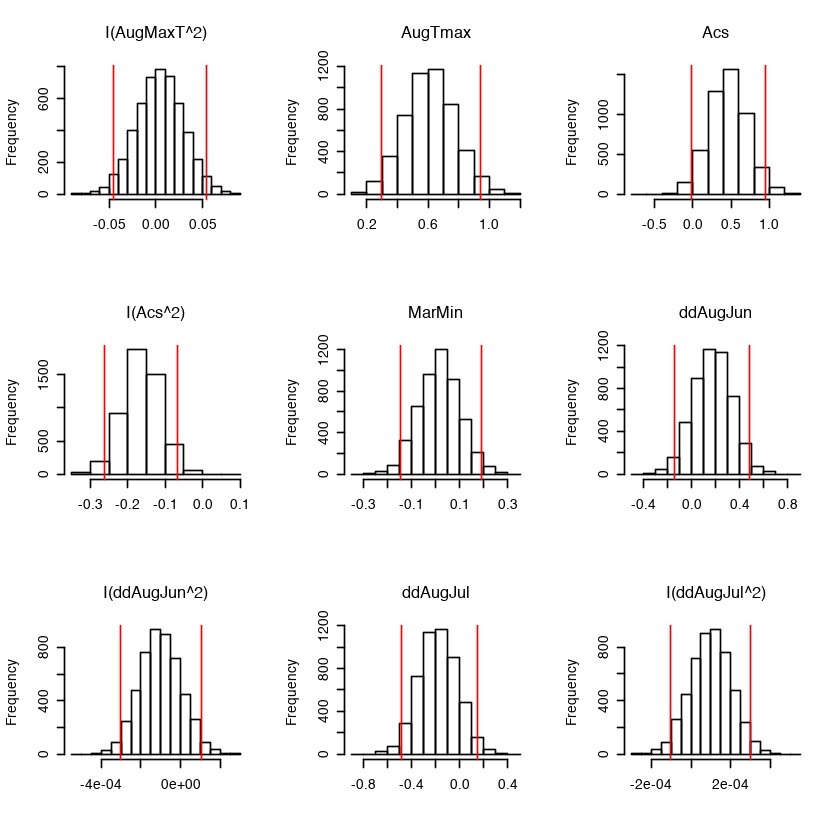

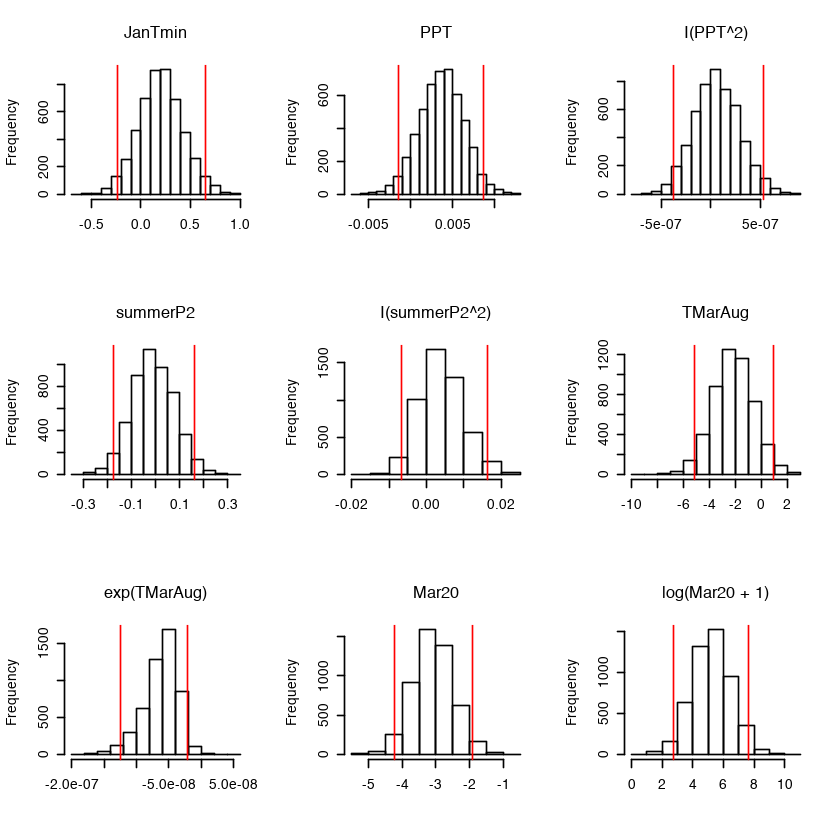

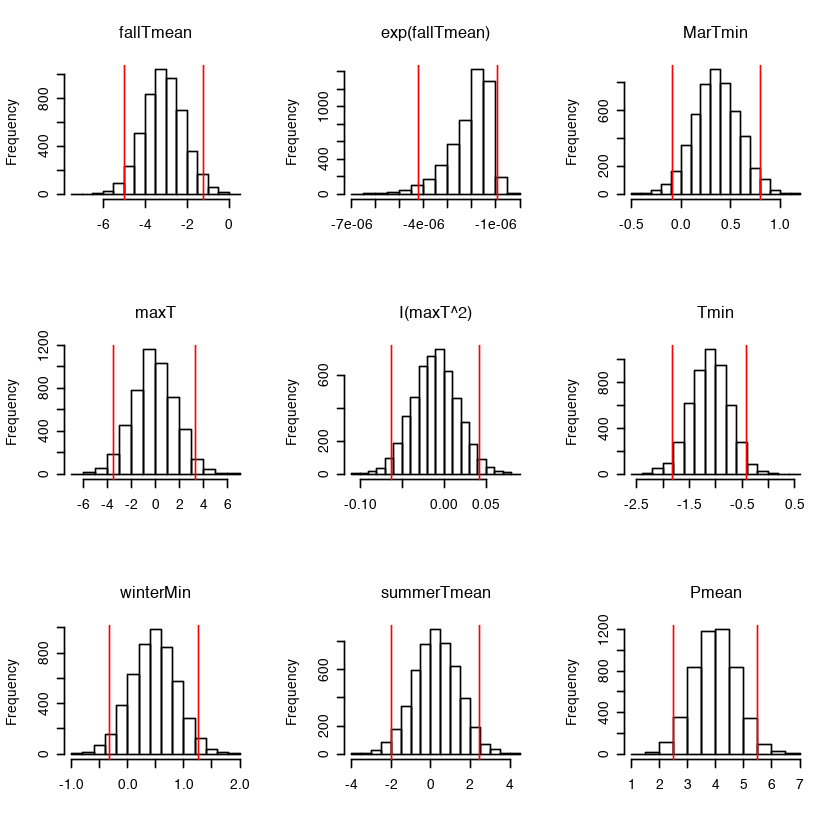

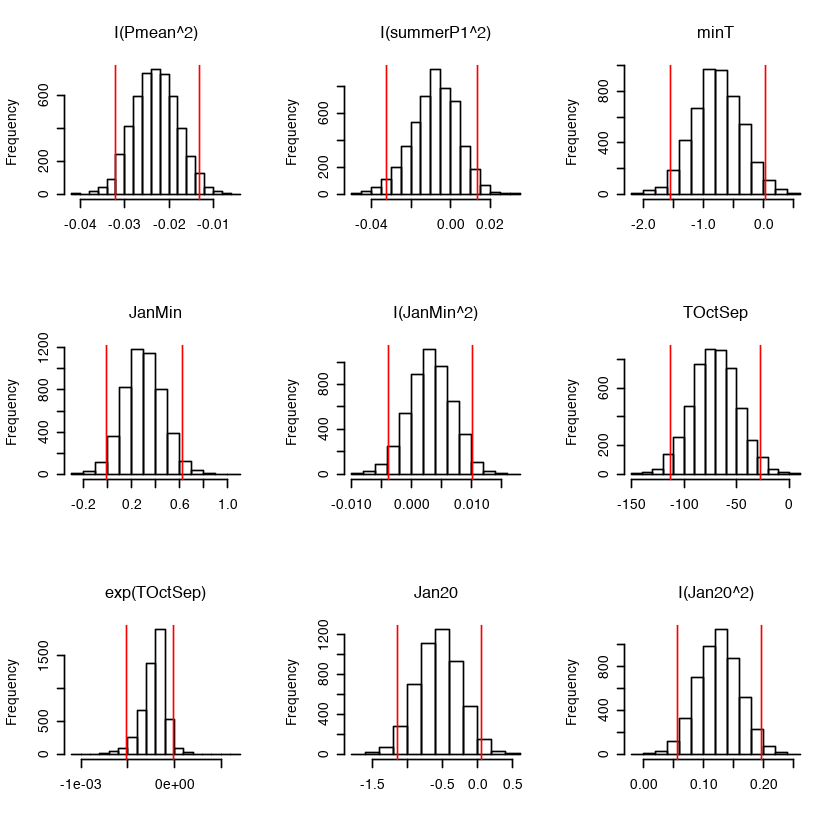

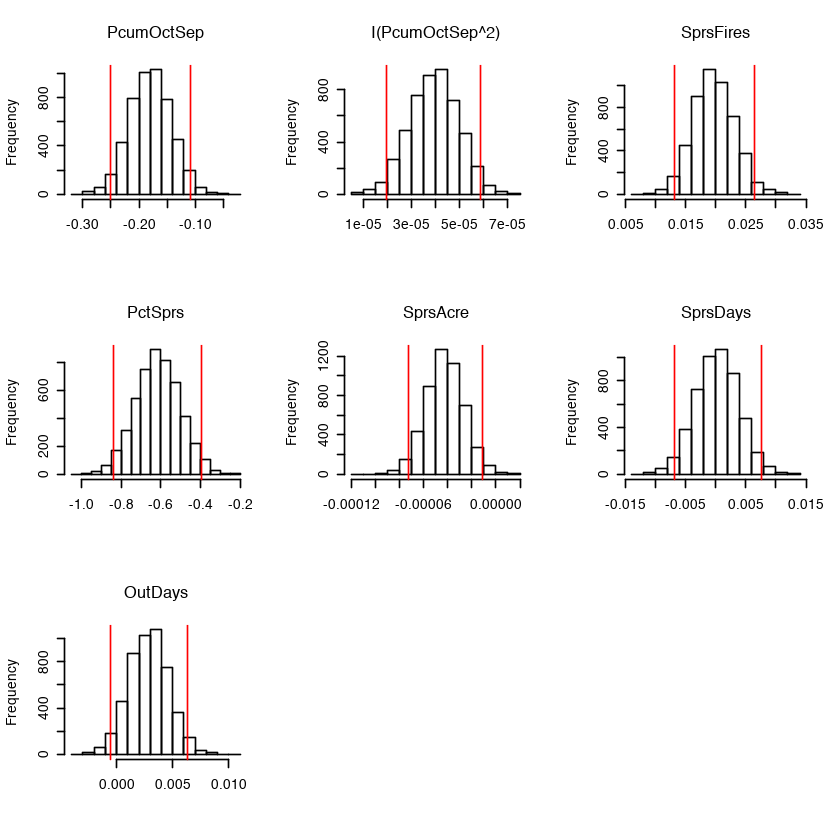

In [19]:
par(mfrow=c(3, 3))
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        hist(bstar[,field], main=field, xlab='')
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
    }
}

remove these variables in the model:
'lon' 'I(lon^2)' 'I(etopo1^2)' 'mStdAge' 'I(mStdAge^2)' 'PctLarge' 'log(vcc)' 'mfri' 'log(mfri)' 'prs' 'I(prs^2)' 'pms' 'pls' 'GAP2' 'GAP3' 'cwd' 'maxAugT' 'I(maxAugT^2)' 'I(summerP0^2)' 'I(mi^2)' 'Tvar' 'AugMaxT' 'I(AugMaxT^2)' 'Acs' 'ddAugJun' 'I(ddAugJun^2)' 'ddAugJul' 'JanTmin' 'I(summerP2^2)' 'TMarAug' 'MarTmin' 'maxT' 'I(maxT^2)' 'winterMin' 'summerTmean' 'summerP1' 'I(summerP1^2)' 'minT' 'I(JanMin^2)' 'exp(TOctSep)' 'Jan20' 'SprsDays' 'OutDays' 

In [22]:
mod <- lm(
    log(beetleAcres) ~ lat + I(lat^2) + etopo1
    + density + I(density^2) + PctOld + vcc 
    + GAP1 + vpd + I(vpd^2) + I(cwd^2) 
    + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugTmax 
    + I(Acs^2) + MarMin + ddAugJun + I(ddAugJul^2) + PPT + I(PPT^2) 
    + summerP2 + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + Tmin + Pmean + I(Pmean^2) 
    + JanMin + TOctSep + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre,
    data=data)

In [23]:
mod.r <- step(mod, trace=0)

In [24]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lat + I(lat^2) + etopo1 + density + 
    I(density^2) + PctOld + GAP1 + vpd + I(vpd^2) + I(cwd^2) + 
    summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(Tvar^2) + 
    wd + I(wd^2) + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugTmax + 
    I(Acs^2) + MarMin + PPT + I(PPT^2) + summerP2 + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + Tmin + 
    Pmean + I(Pmean^2) + JanMin + TOctSep + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2) + SprsFires + PctSprs + SprsAcre, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7614 -1.0590  0.0799  1.1330  8.2748 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.807e+01  8.254e+00  -4.612 4.17e-06 ***
lat              1.684e+00  3.838e-01   4.389 1.18e-05 ***
I(lat^2)        -1.926e-02  4.688e-03  -4.108 4.11e-05 ***
etopo1           1.838e-03  2.149e-04   8.553  < 2e-16 ***
density          3.717e-05  3.773e-06   9.852 

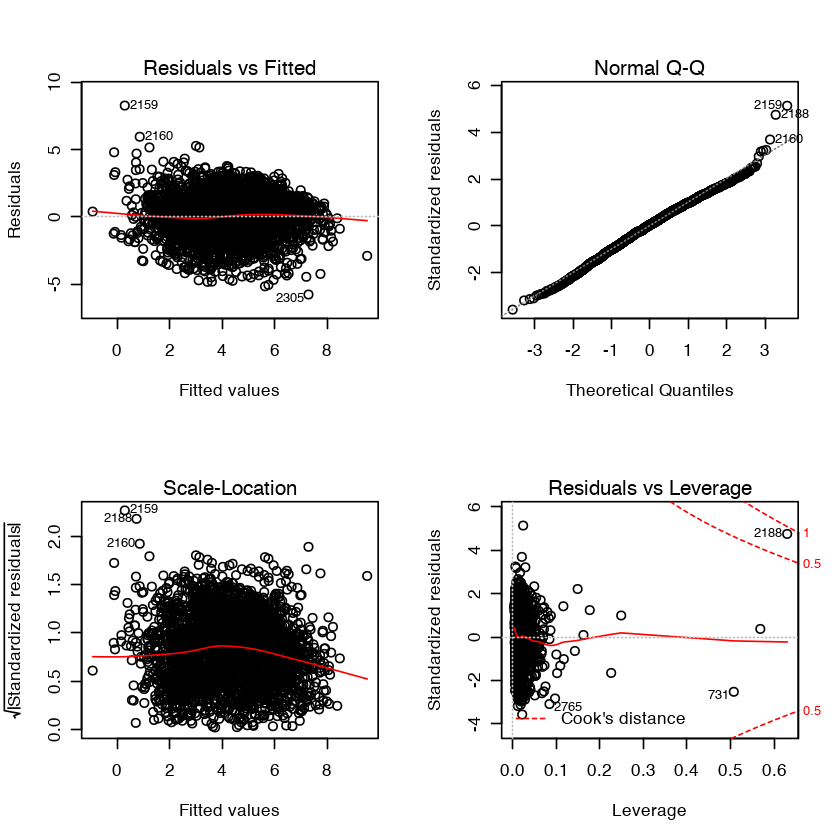

In [25]:
par(mfrow=c(2, 2))
plot(mod.r)

In [27]:
data[2188, ]

lon       lat      etopo1   beetleAcres host forest mStdAge density 
2188 -108.4801 47.99143 1141.424 230.2056    1    1      51      232346.7
     PctLarge   PctOld    ⋯ minT      JanMin    TOctSep  Jan20    PcumOctSep
2188 0.08679834 0.2384615 ⋯ -29.75507 -26.47876 5.810339 5.996357 765.0241  
     SprsFires PctSprs   SprsAcre  SprsDays OutDays
2188 11        0.9166667 0.4636364 0        1

In [28]:
mod2 <- update(mod, . ~ ., data=data[-2188, ])
mod2.r <- step(mod2, trace=0)

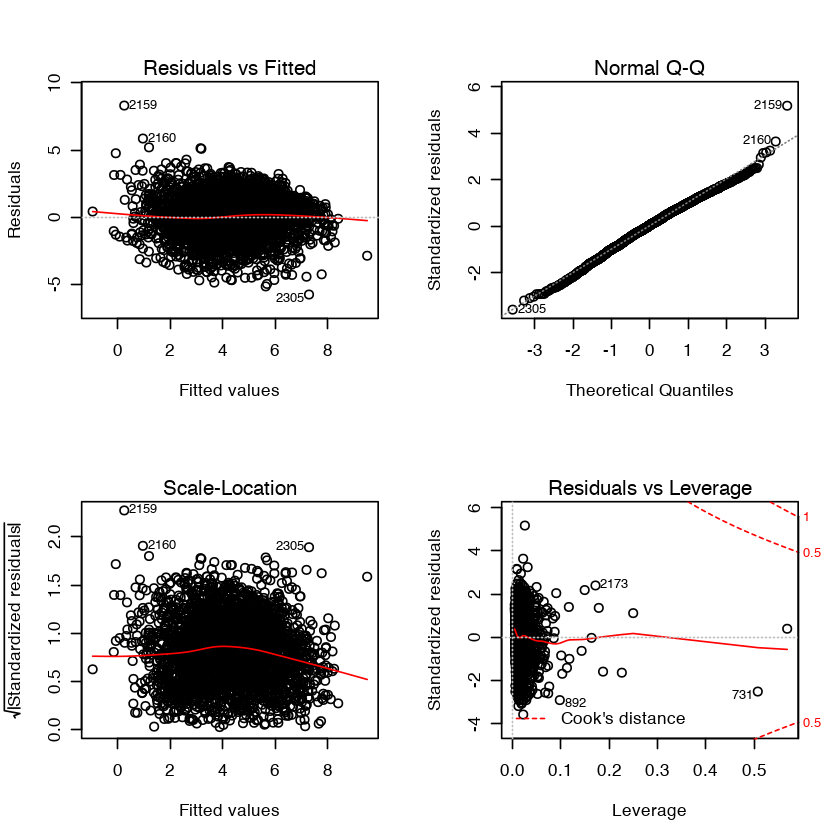

In [30]:
par(mfrow=c(2, 2))
plot(mod2.r)

In [31]:
data <- data[-2188, ]

In [32]:
data$preds <- mod2.r$fitted

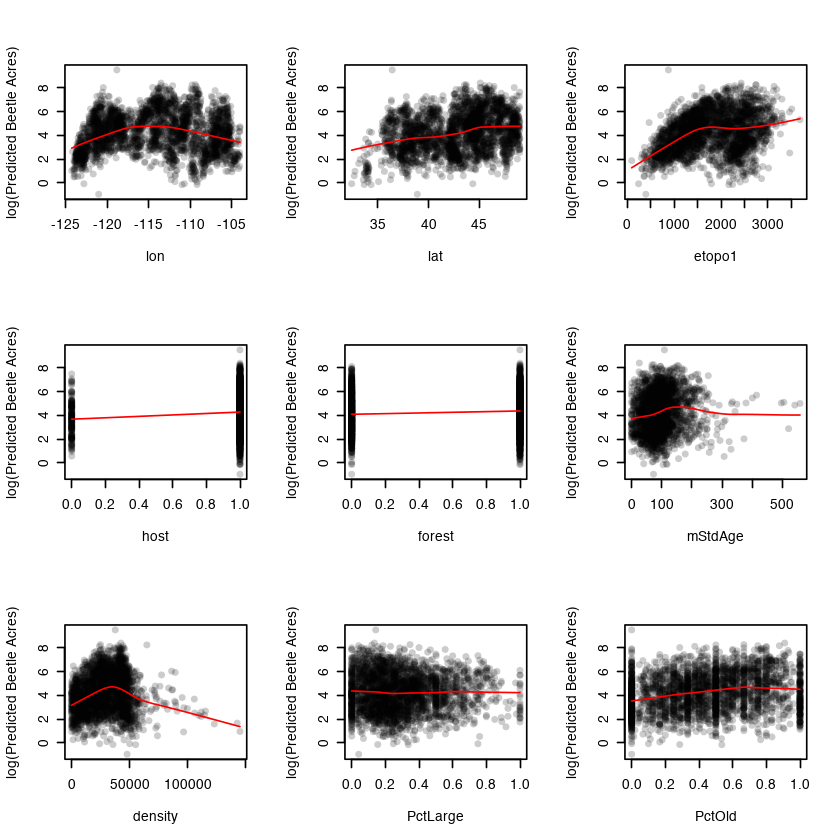

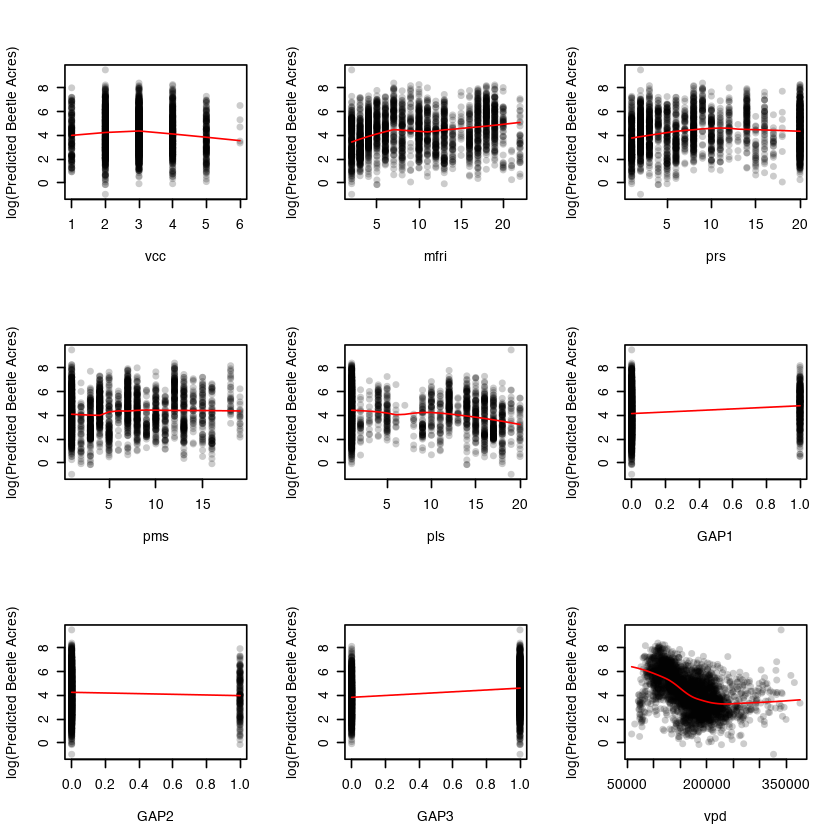

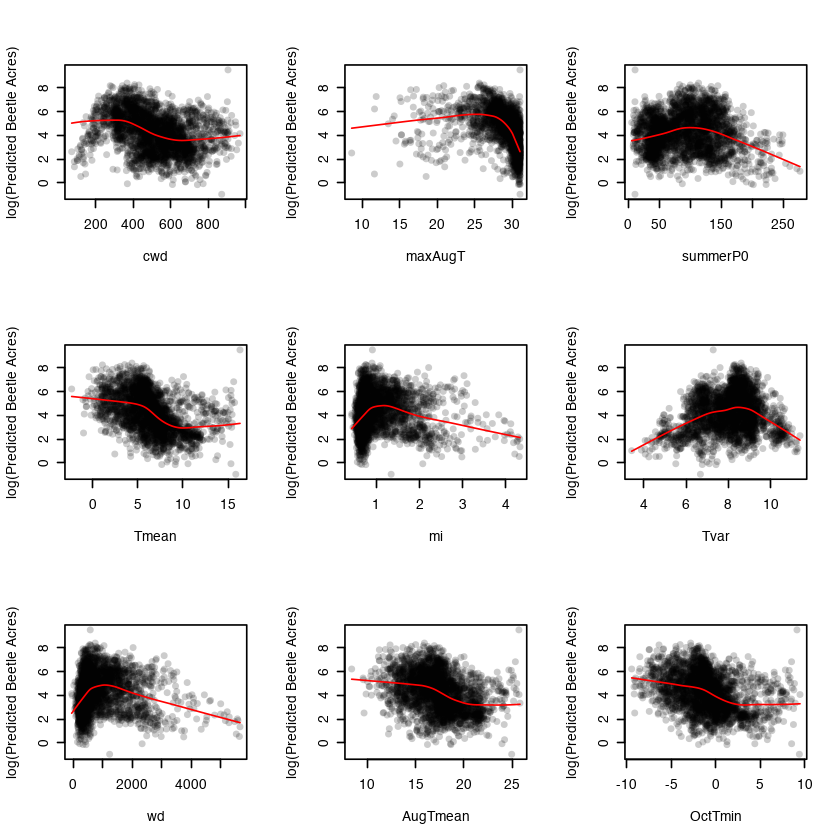

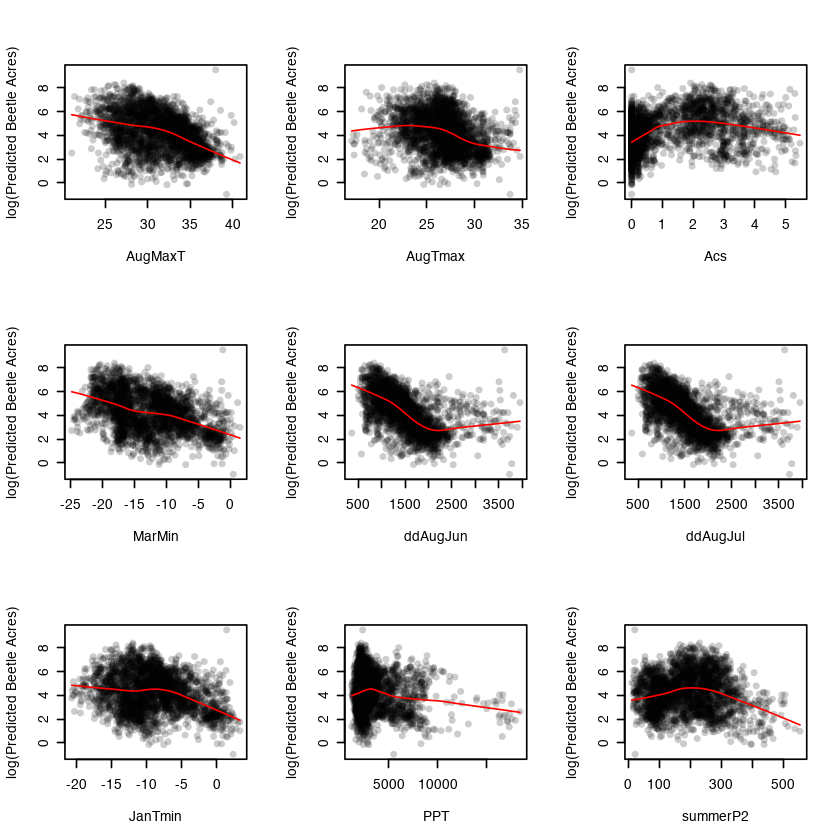

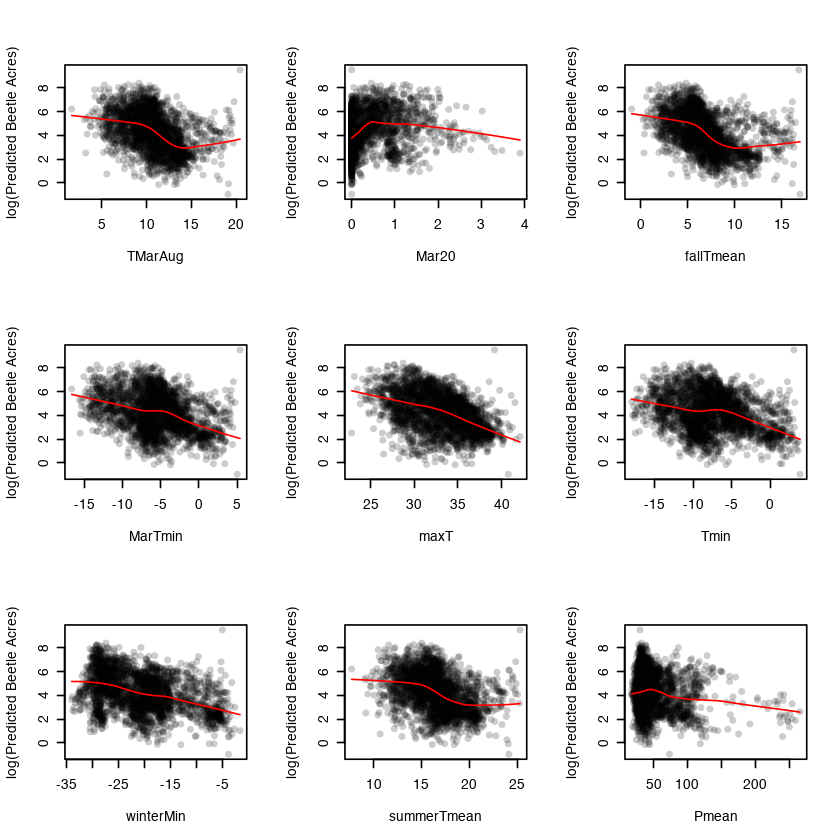

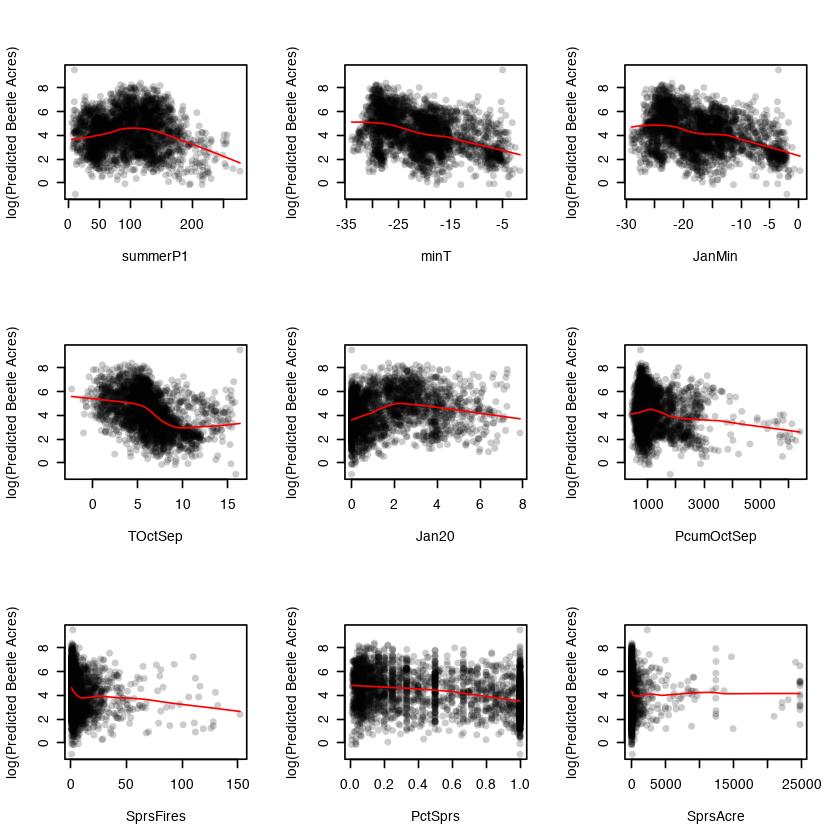

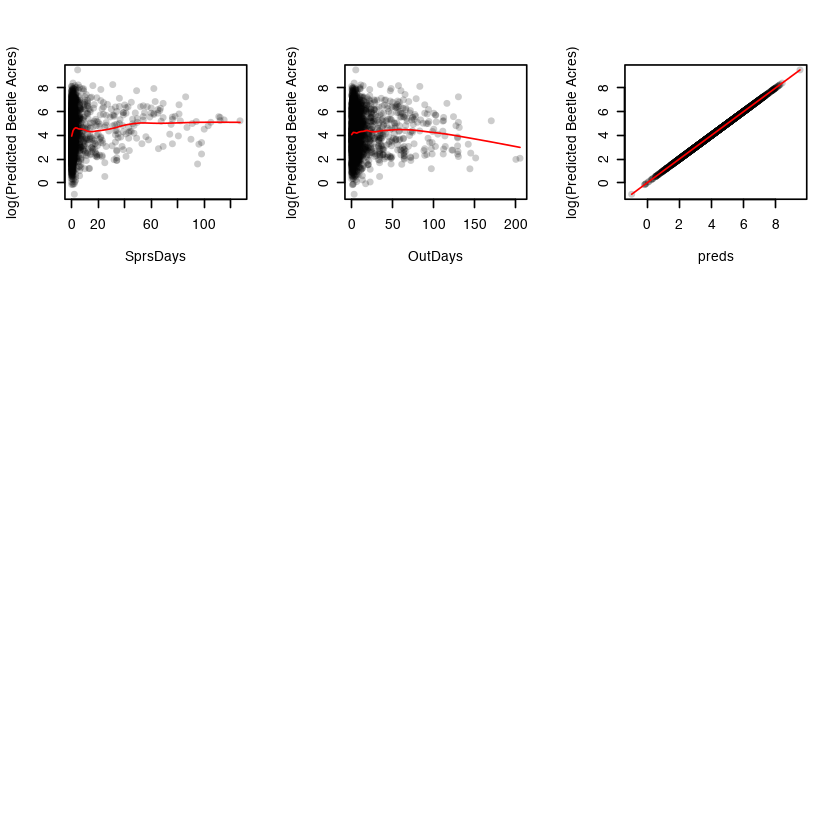

In [33]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (field != 'beetleAcres') {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [34]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

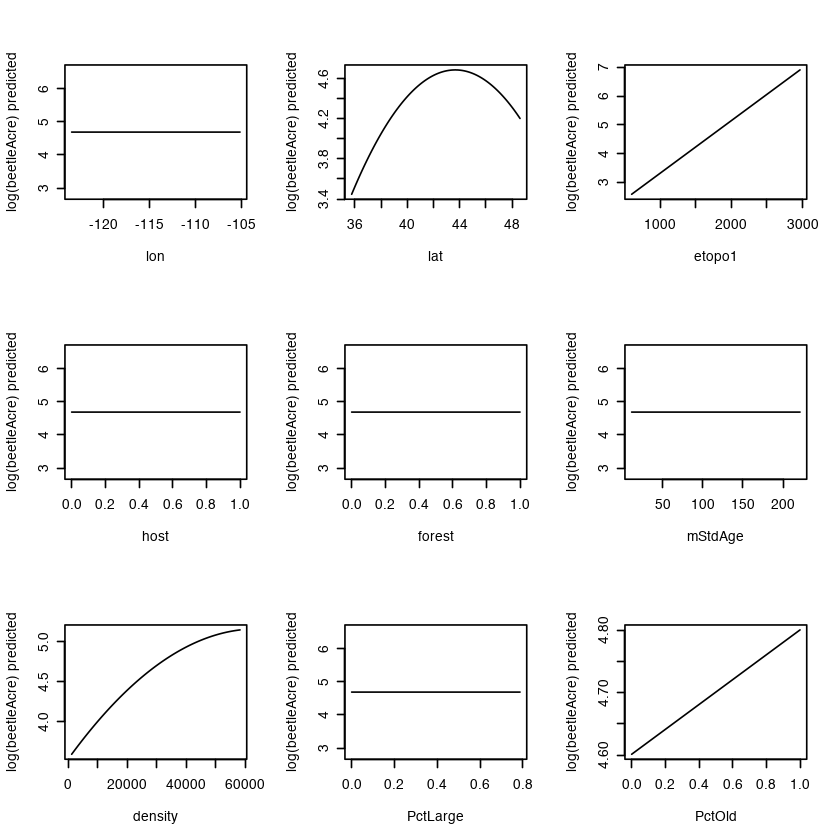

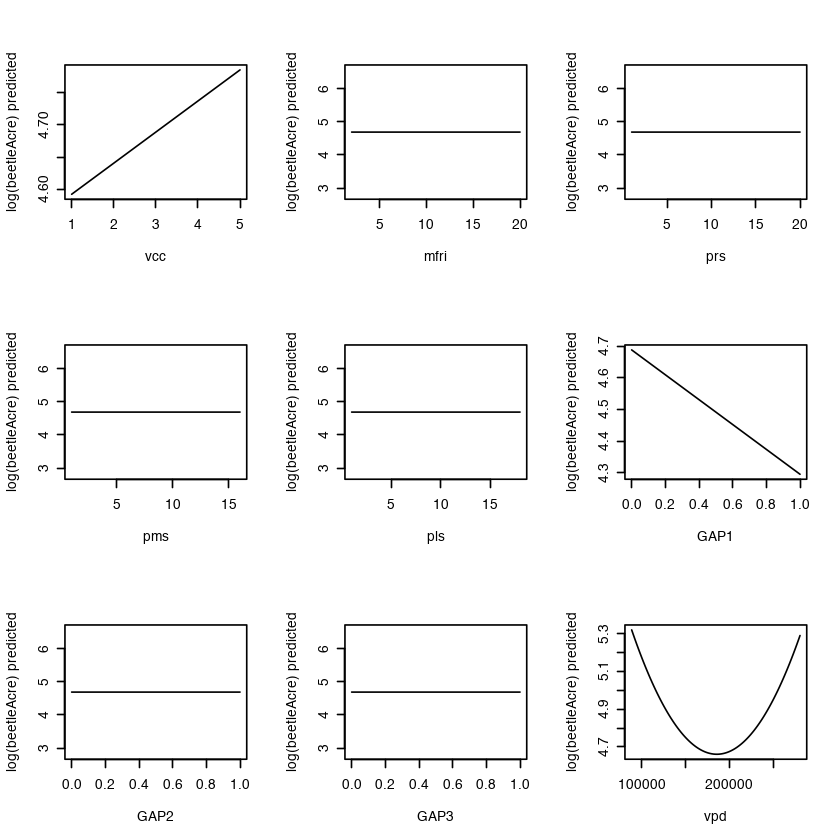

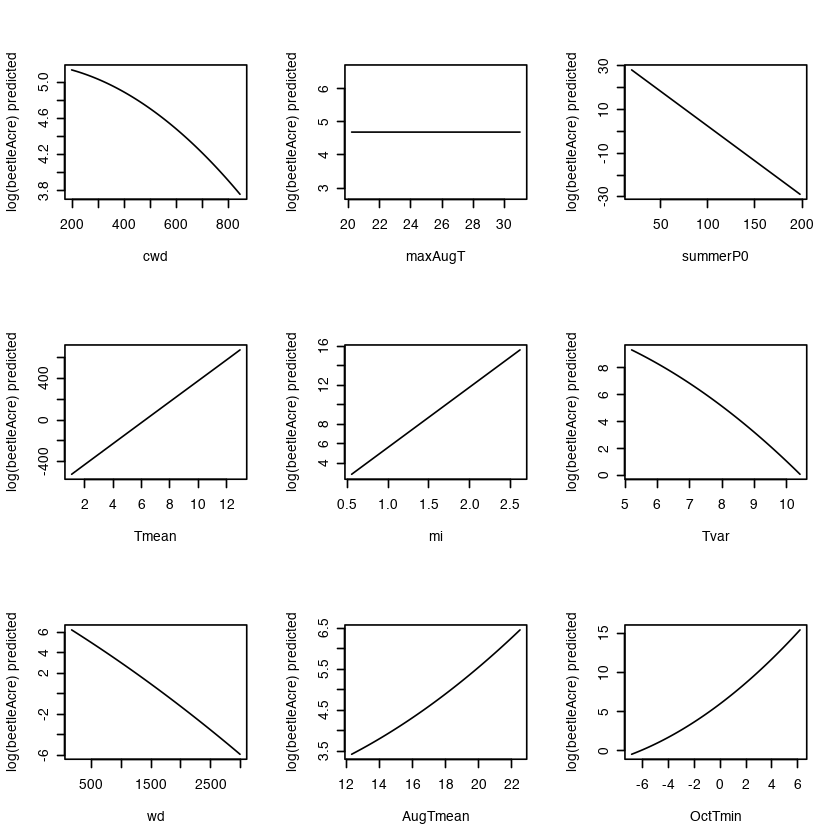

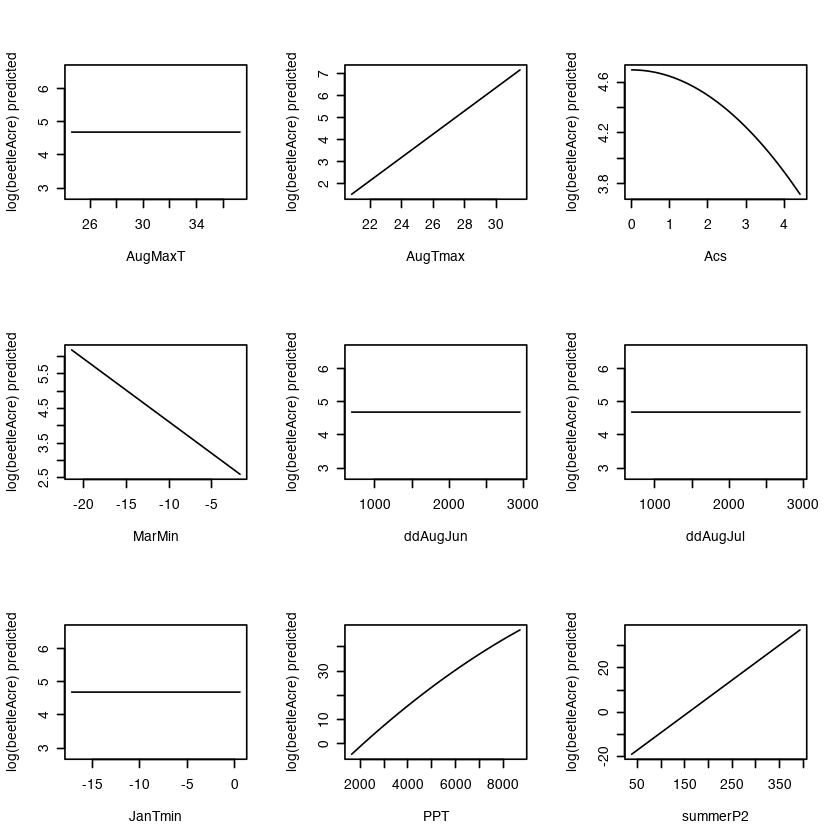

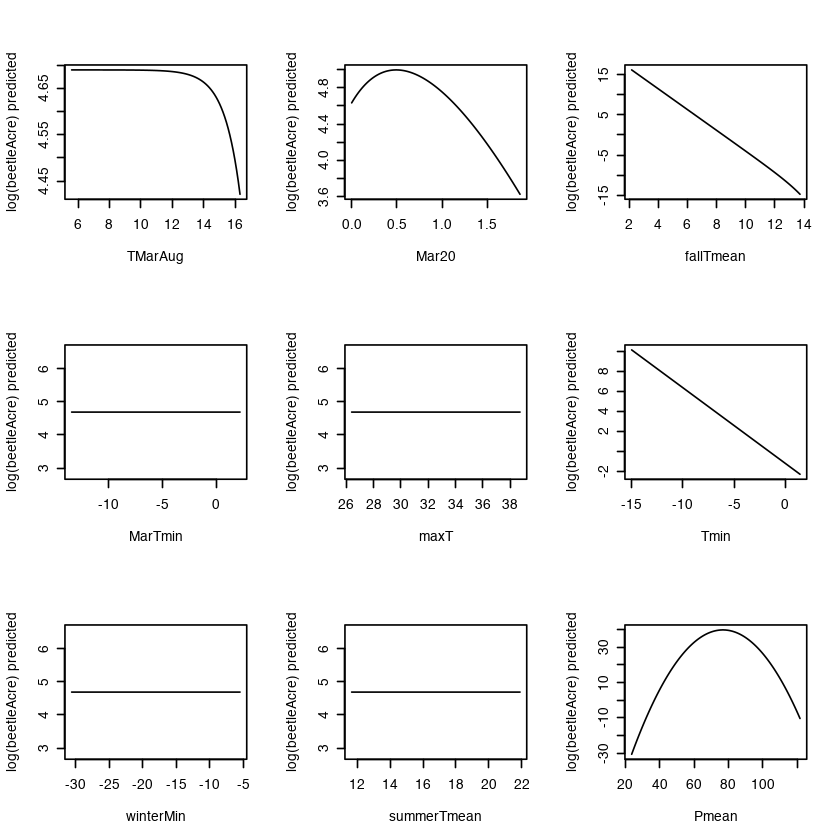

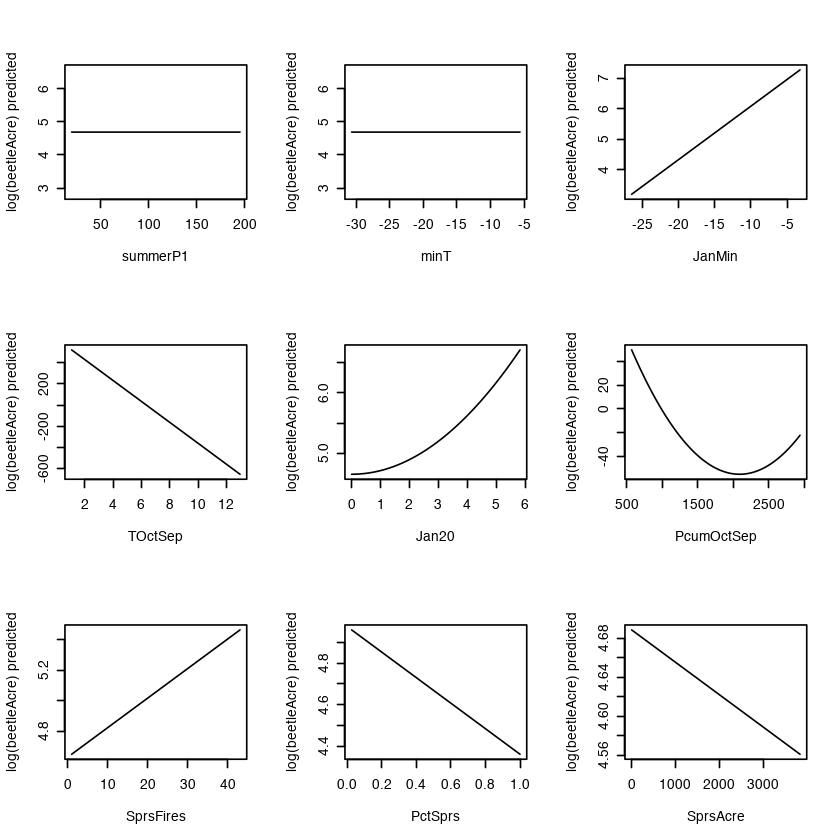

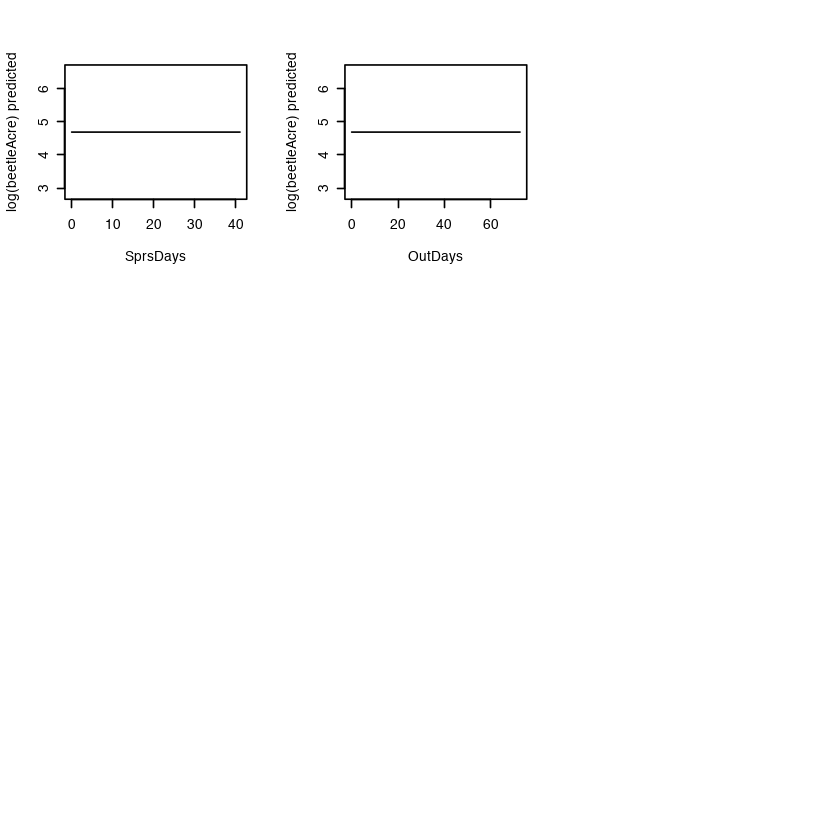

In [35]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod2.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

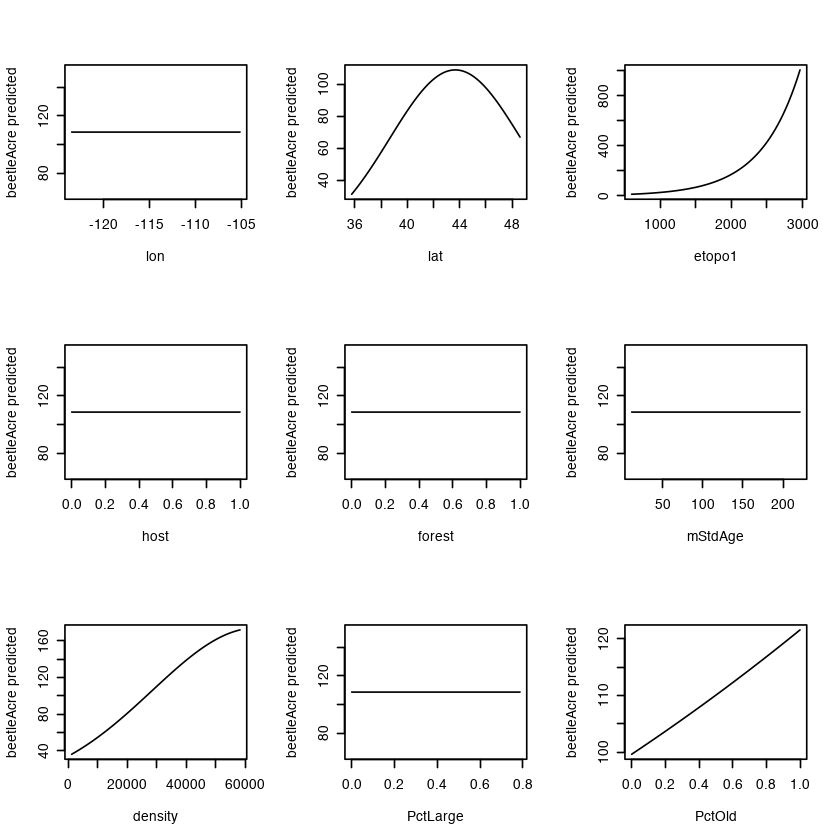

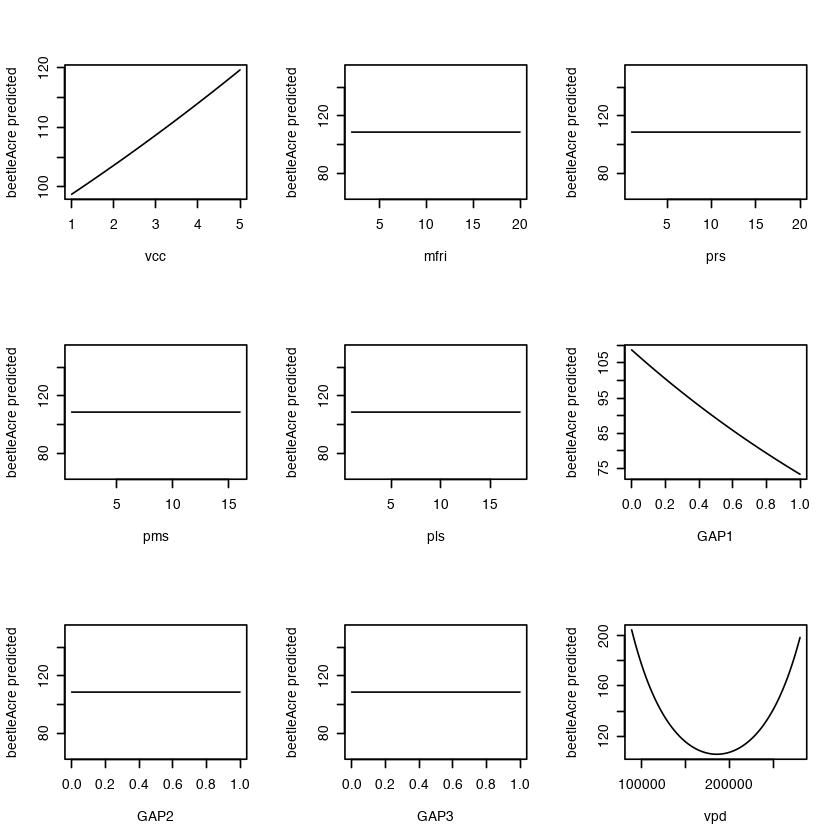

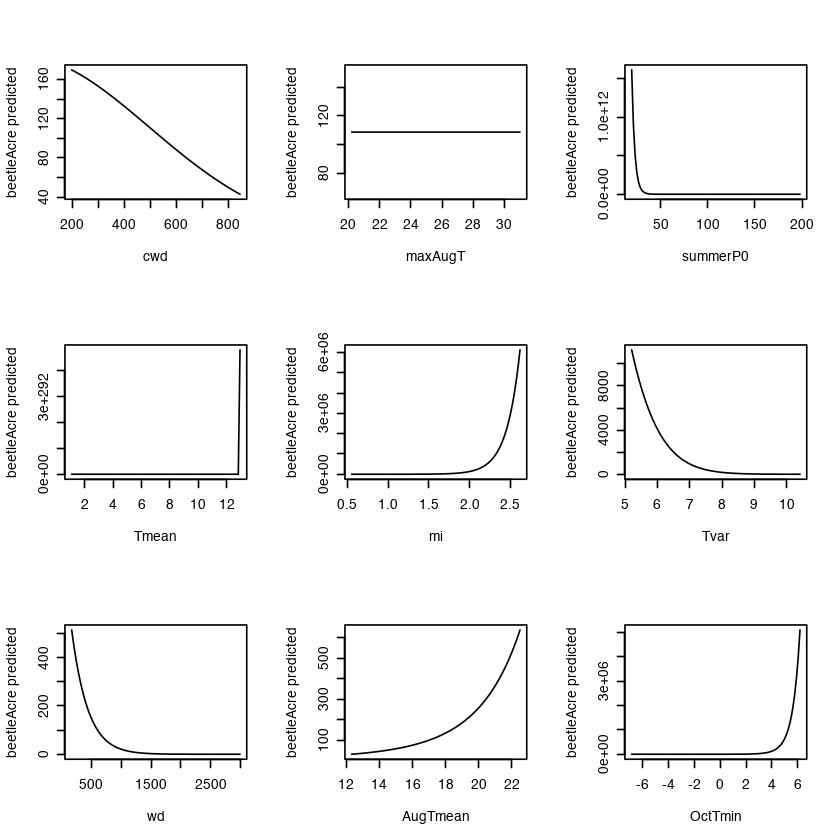

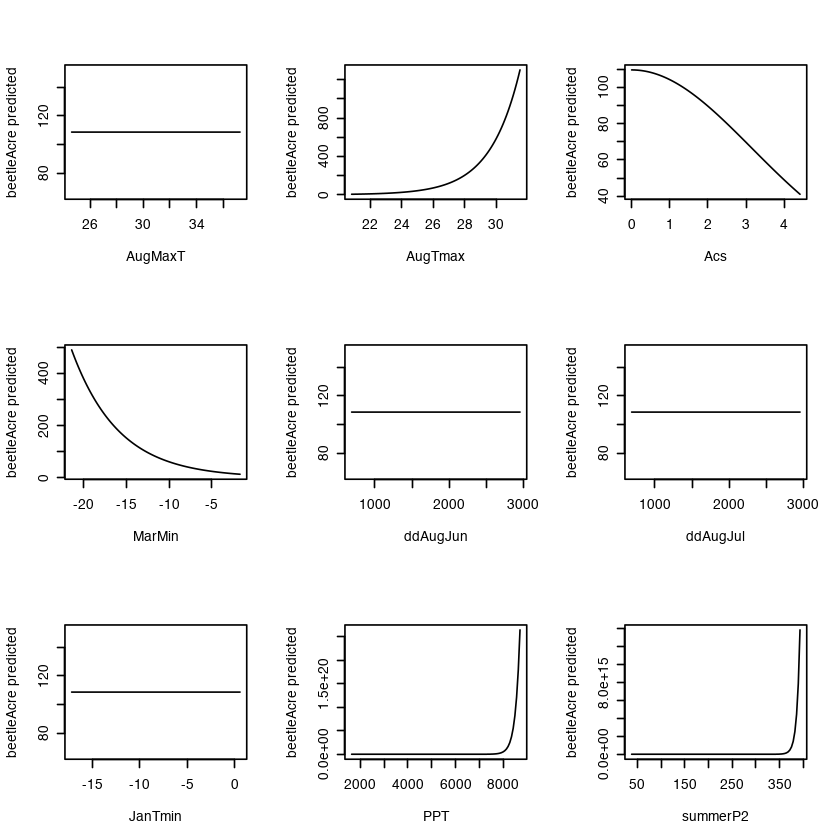

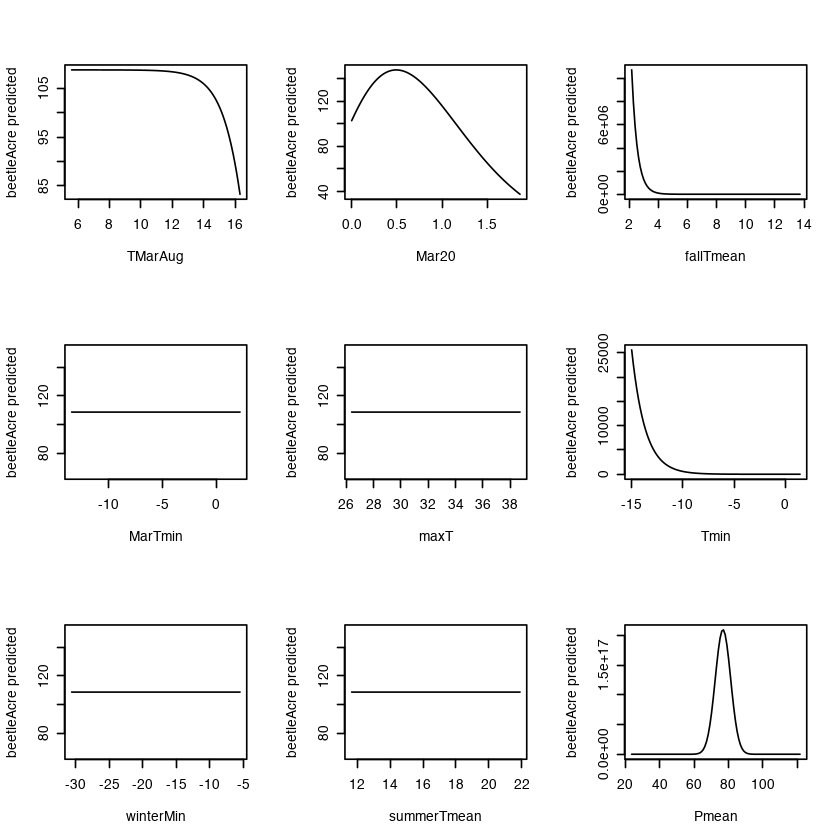

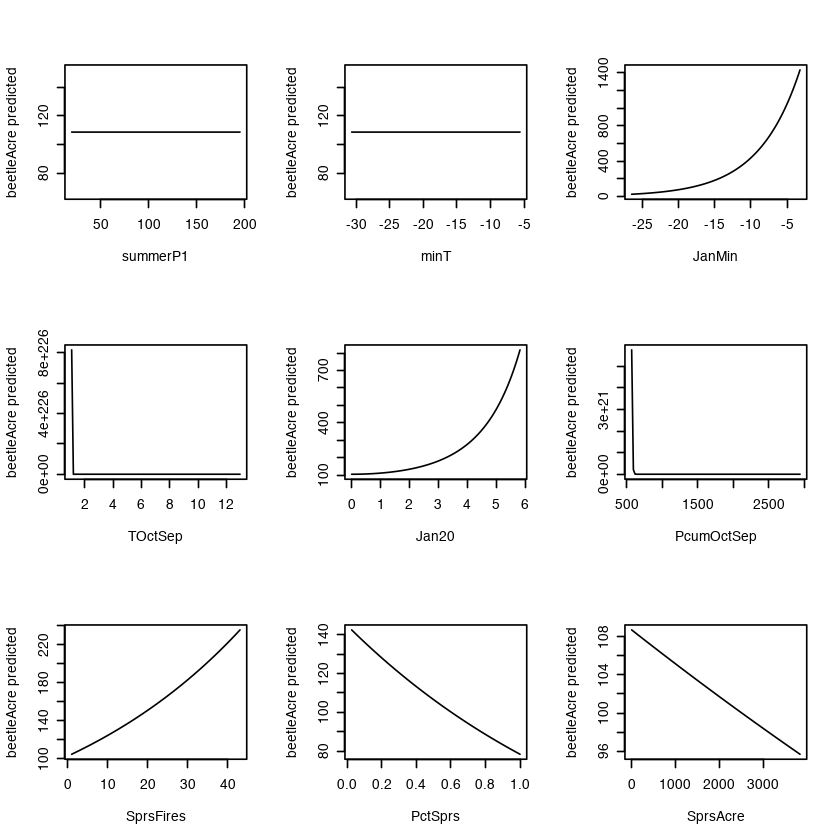

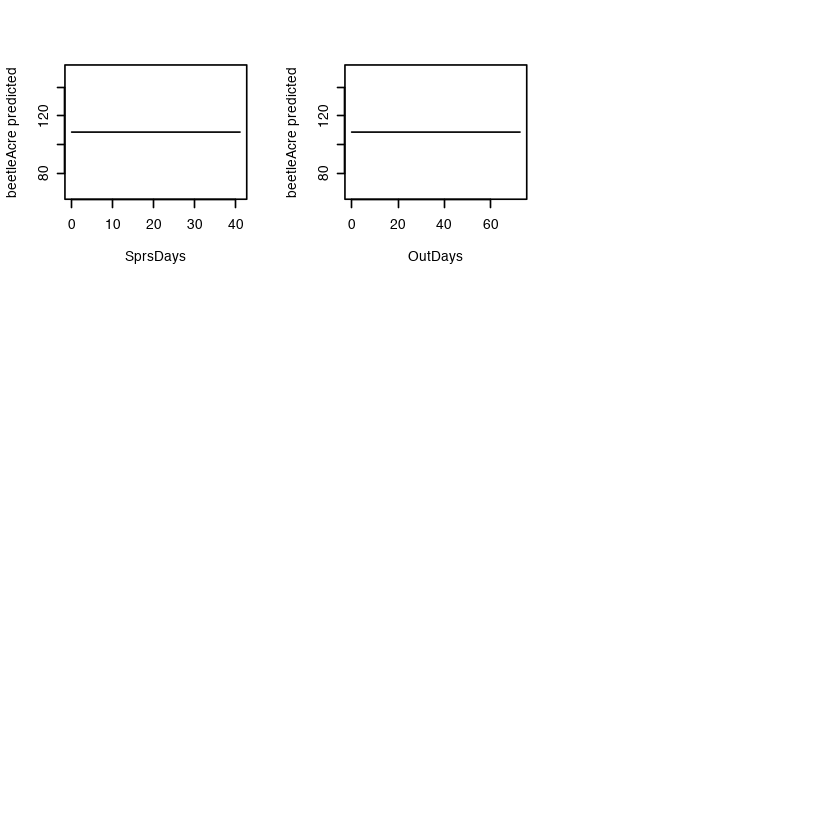

In [36]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod2.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [38]:
sq_terms <- c('lat', 'density', 'vpd', 'cwd', 'Tmean', 'Tvar', 'wd', 'AugTmean', 'OctTmin',
              'Acs', 'ddAugJul', 'PPT', 'Pmean', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lat in a squared term...
Calculated density in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated Tmean in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated AugTmean in a squared term...
Calculated OctTmin in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated Pmean in a squared term...
Calculated Jan20 in a squared term...
Calculated PcumOctSep in a squared term...
Calculated Tmean in a exponential term...
Calculated TMarAug in a exponential term...
Calculated fallTmean in a exponential term...
Calculated Mar20 in a logarithm term...


In [39]:
selected.vars <- c('lat', 'etopo1', 'density', 'PctOld', 'vcc', 'GAP1', 'vpd', 'summerP0', 'Tmean',
                   'mi', 'wd', 'AugTmean', 'OctTmin', 'AugTmax', 'MarMin', 'ddAugJun', 'PPT',
                   'summerP2', 'Mar20', 'fallTmean', 'Tmin', 'Pmean', 'JanMin', 'TOctSep', 'PcumOctSep',
                   'SprsFires', 'PctSprs', 'SprsAcre', 
                   paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [40]:
mod <- lm(beetleAcres ~ ., data=df)

In [41]:
mod.r <- step(mod, trace=0)

In [42]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + etopo1 + density + PctOld + 
    vcc + GAP1 + vpd + summerP0 + Tmean + mi + wd + OctTmin + 
    AugTmax + MarMin + PPT + summerP2 + Mar20 + fallTmean + Tmin + 
    Pmean + JanMin + TOctSep + PcumOctSep + SprsFires + PctSprs + 
    SprsAcre + lat_sq + density_sq + vpd_sq + cwd_sq + Tmean_sq + 
    Tvar_sq + wd_sq + AugTmean_sq + OctTmin_sq + Acs_sq + PPT_sq + 
    Pmean_sq + Jan20_sq + PcumOctSep_sq + Tmean_exp + TMarAug_exp + 
    fallTmean_exp + Mar20_logp1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7664 -1.0557  0.0694  1.1449  8.3139 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.23700    0.03065 138.243  < 2e-16 ***
lat              6.48974    1.43150   4.534 6.05e-06 ***
etopo1           1.24220    0.14523   8.554  < 2e-16 ***
density          0.86827    0.08090  10.732  < 2e-16 ***
PctOld           0.05902    0.03360   1.756 0.079116 .  
vcc              0.04669    0.0329

In [44]:
sort(abs(mod.r$coefficients))

vcc        PctOld      SprsAcre          GAP1       PctSprs 
   0.04668602    0.05901695    0.07651111    0.13375083    0.23832996 
    SprsFires        Acs_sq        cwd_sq    density_sq      Jan20_sq 
   0.26228904    0.27083367    0.34289112    0.53214721    0.53617200 
  TMarAug_exp    OctTmin_sq         wd_sq   AugTmean_sq       density 
   0.54171057    0.66816811    0.67264205    0.77720078    0.86826818 
       MarMin        JanMin        etopo1           vpd        vpd_sq 
   0.96579418    1.11410853    1.24219854    1.24864505    1.26055652 
fallTmean_exp       AugTmax   Mar20_logp1      Tmean_sq         Mar20 
   1.29458377    1.43594122    1.67177421    1.83976030    1.87471428 
    Tmean_exp       Tvar_sq            wd          Tmin            mi 
   1.90809770    2.17034566    2.92281267    3.15835648    3.59520904 
      OctTmin   (Intercept)        lat_sq           lat     fallTmean 
   3.75643129    4.23699987    6.27198498    6.48974140    6.95260962 
       PPT_sq      summerP2      summerP0           PPT         Pmean 
   7.97646854   15.07841068   15.25199828   21.79089142  117.28204848 
   PcumOctSep      Pmean_sq PcumOctSep_sq       TOctSep         Tmean 
 141.53725007  156.84133929  166.95903135  274.47513552  279.51416241